In [6]:
# Anova
import pandas as pd
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import MultiComparison

In [8]:
tratamento = pd.read_csv('anova.csv', sep=';')
tratamento.head()

,Sexo,Remedio,Horas
0,F,A,5
1,F,A,10
2,F,A,7
3,F,A,7
4,M,A,7


<Axes: title={'center': 'Horas'}, xlabel='[Remedio]'>

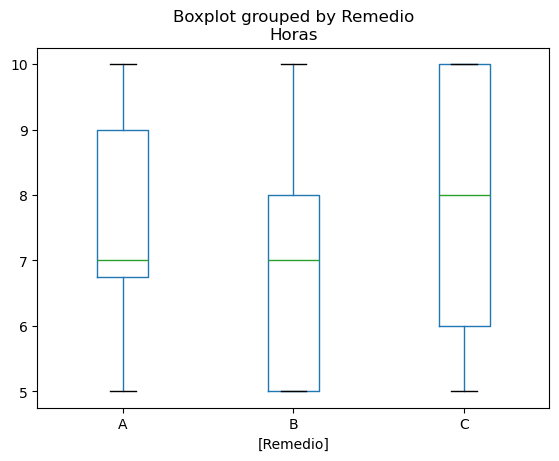

In [10]:
tratamento.boxplot(by="Remedio", grid=False)

In [16]:
# Queremos saber se existe variação considerável no tempo de fazer efeito do remédio
# Criamos nosso modelo de regressão linear e execução de teste
modelo1 = ols('Horas ~ Remedio', data=tratamento).fit()
resultado1 = sm.stats.anova_lm(modelo1)
resultado1

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.537618,0.591966
Residual,21.0,79.750000,3.797619,NaN,NaN


In [18]:
# Análise de variância de dois fatores
# Não conseguimos rejeitar H0
modelo2 = ols("Horas ~ Remedio * Sexo", data=tratamento).fit()
resultado2 = sm.stats.anova_lm(modelo2)
resultado2

,df,sum_sq,mean_sq,F,PR(>F)
Remedio,2.0,4.083333,2.041667,0.532609,0.596042
Sexo,1.0,4.166667,4.166667,1.086957,0.310948
Remedio:Sexo,2.0,6.583333,3.291667,0.858696,0.440360
Residual,18.0,69.000000,3.833333,NaN,NaN


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper reject
-------------------------------------------------
     A      B   -0.625 0.7991 -3.081 1.831  False
     A      C    0.375 0.9219 -2.081 2.831  False
     B      C      1.0 0.5689 -1.456 3.456  False
-------------------------------------------------


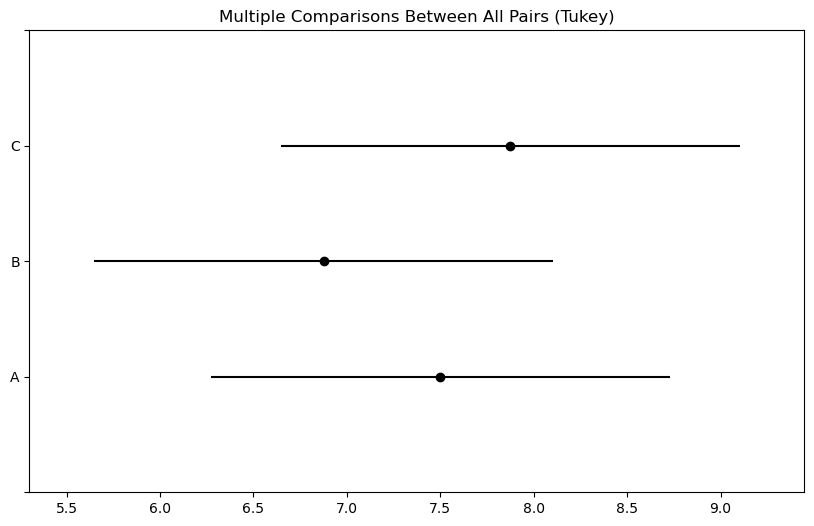

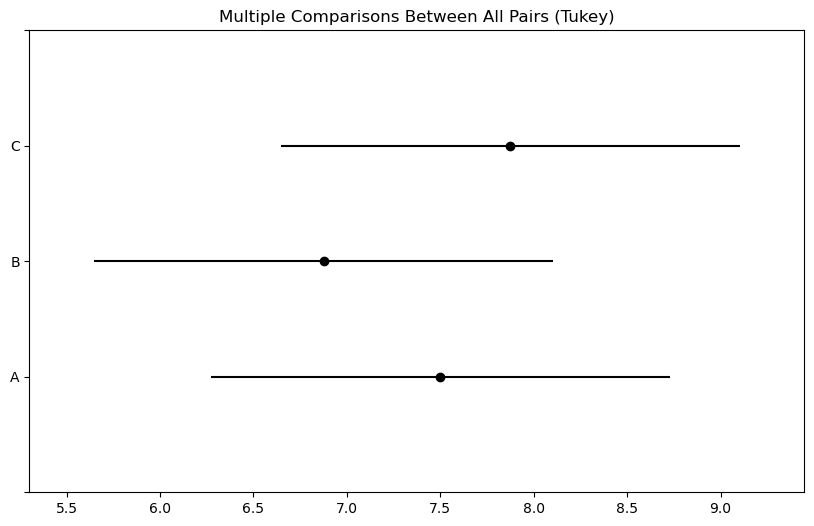

In [22]:
# Teste de tukey
mc = MultiComparison(tratamento['Horas'], tratamento["Remedio"])
resultado_teste = mc.tukeyhsd()
print(resultado_teste)
resultado_teste.plot_simultaneous()